# Importing all the required libraries
Imported essential Python libraries for data manipulation, visualization, model building, and evaluation. These include pandas for data handling, numpy for numerical operations, LabelEncoder for encoding categorical variables, seaborn and matplotlib.pyplot for visualization, sklearn's train_test_split for data splitting, StandardScaler for feature scaling, KNeighborsClassifier for k-Nearest Neighbors algorithm, and GridSearchCV for hyperparameter tuning.

In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


# Load And Read The Dataset
This code reads the CSV file into a DataFrame df and checks for the total number of missing values (NaN) in the entire dataset.

The info() method provides a concise summary of the DataFrame, including the number of non-null values in each column and the data types.

In [102]:
df=pd.read_csv(r"C:\Users\Satya Kilani\OneDrive\Pictures\Documents\hunarintern\task3\breast cancer.csv")
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [103]:
df.isna().sum().sum()

0

# Checking for duplicate rows and columns
Our code snippet effectively checks for duplicate rows and duplicate columns in your DataFrame. Here's a breakdown of what each part does:

In [104]:
duplicate_rows=df[df.duplicated()]
if  not duplicate_rows.empty:
    print("duplicate rows found:",duplicate_rows)
else:
    print("no duplicates")
duplicates=df.columns[df.columns.duplicated()]
if len(duplicates)>0:
    print("duplicates found:",duplicates)
else:
    print("no duplicate columns found")

no duplicates
no duplicate columns found


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Using LabelEncoder for categorical variables
Our code snippet demonstrates how to use LabelEncoder from scikit-learn to encode categorical variables into numeric labels in your DataFrame df_irr. However, there's a more efficient and systematic way to apply LabelEncoder to multiple categorical columns

In [106]:
le=LabelEncoder()
df['diagnosis_label']=le.fit_transform(df['diagnosis'])
df['diagnosis']=df['diagnosis_label']
df.drop(columns='diagnosis_label',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Boxplotting before removing the outliers
The code snippet you provided will generate boxplots for each numerical column in your DataFrame df. These boxplots are useful for visually identifying outliers in the data before any outlier removal process

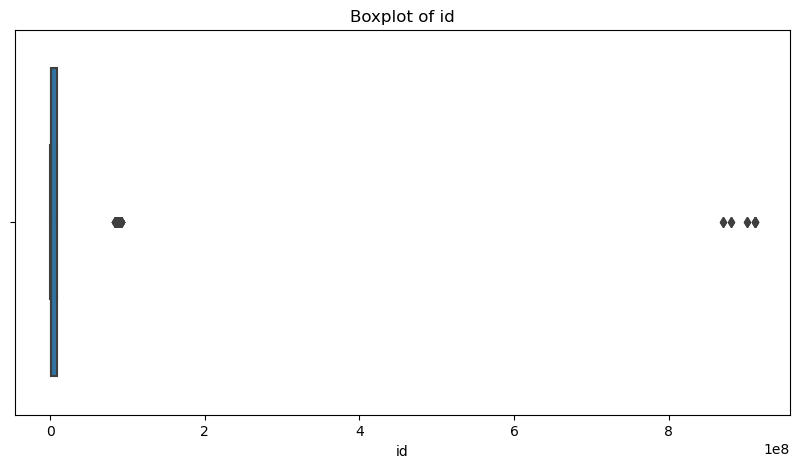

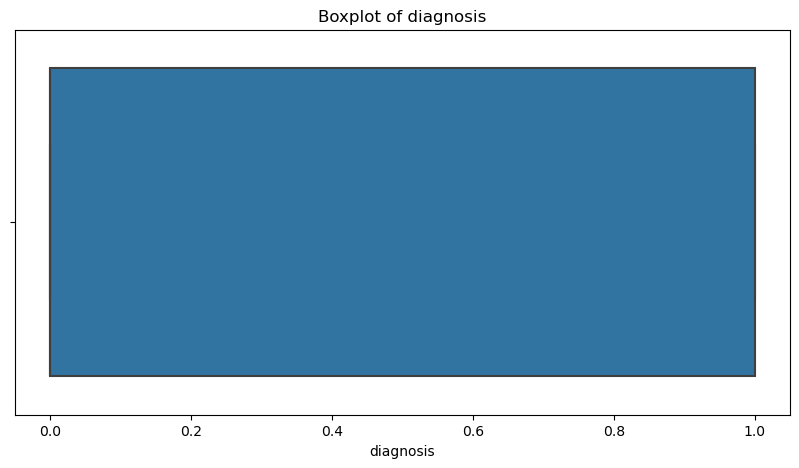

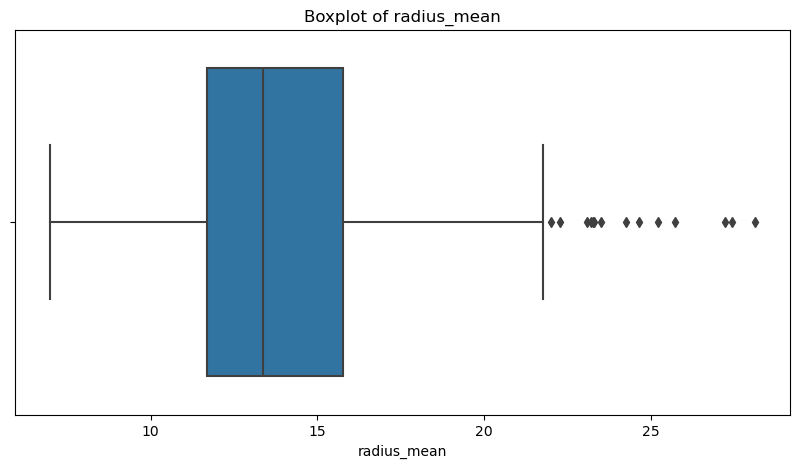

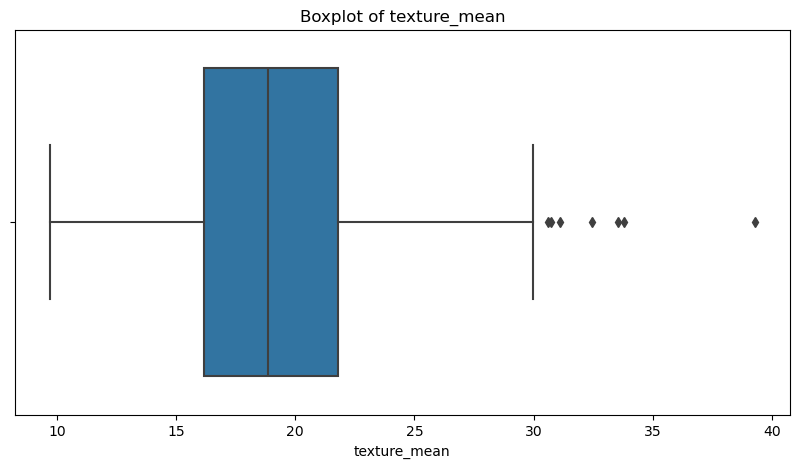

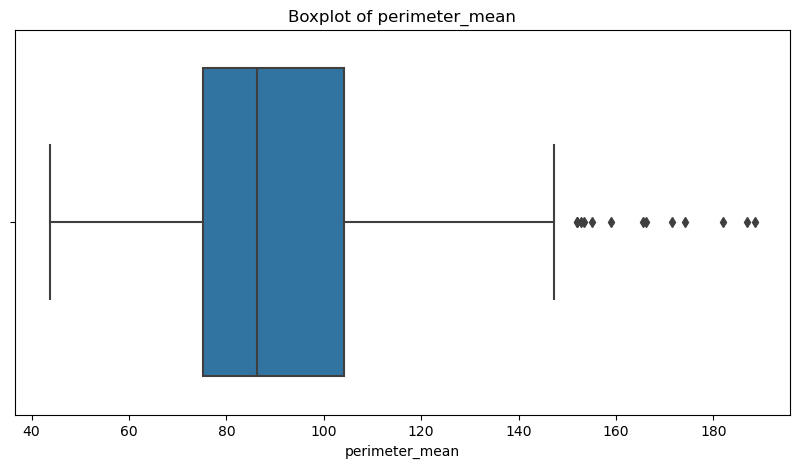

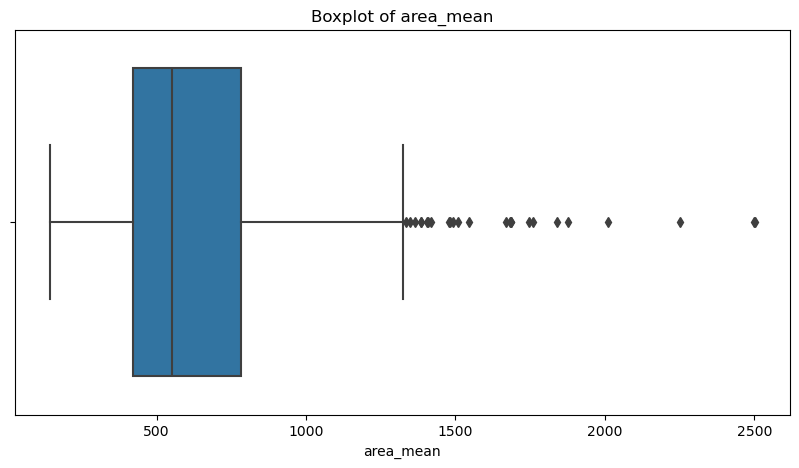

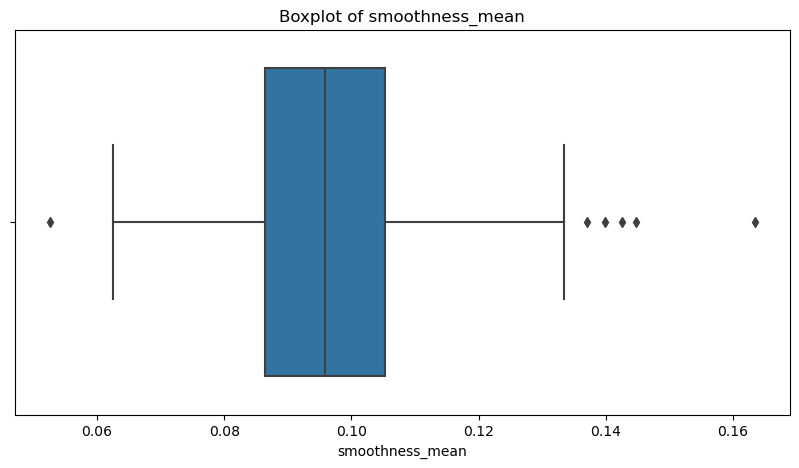

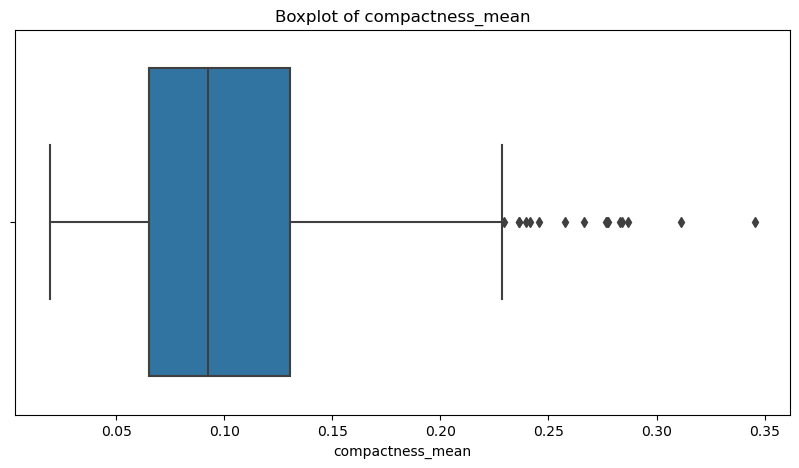

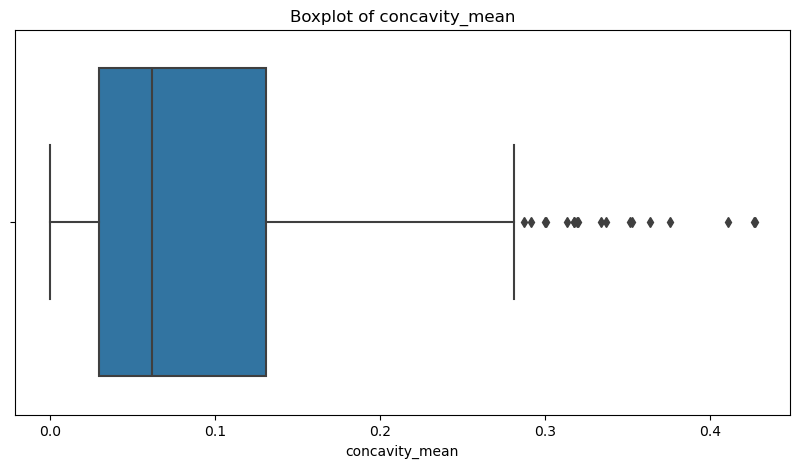

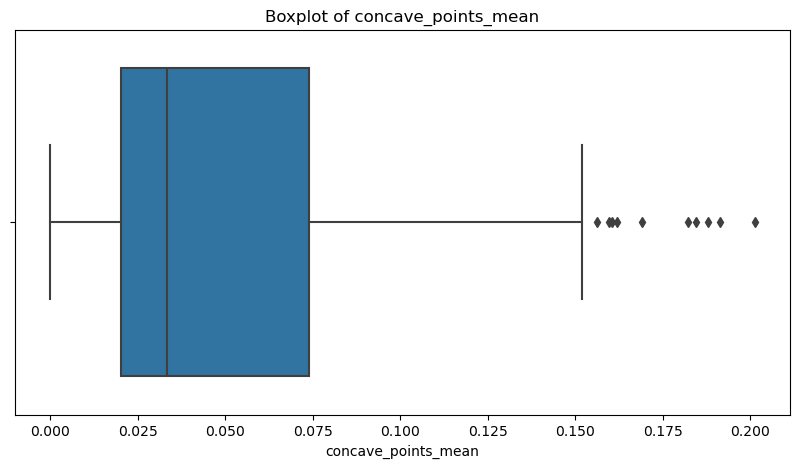

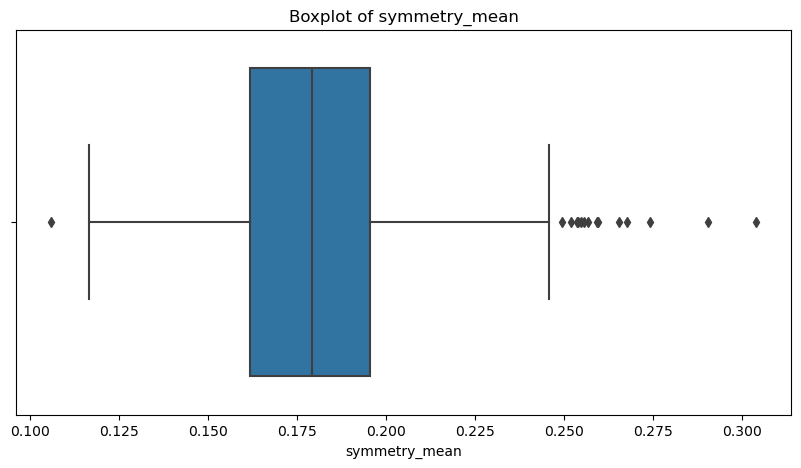

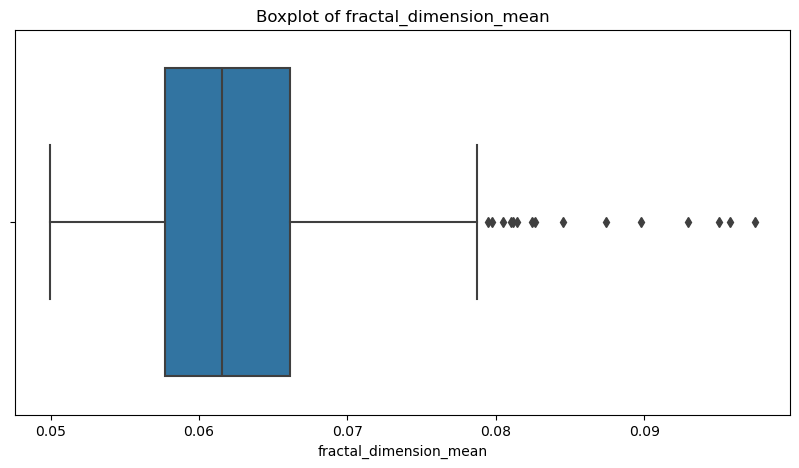

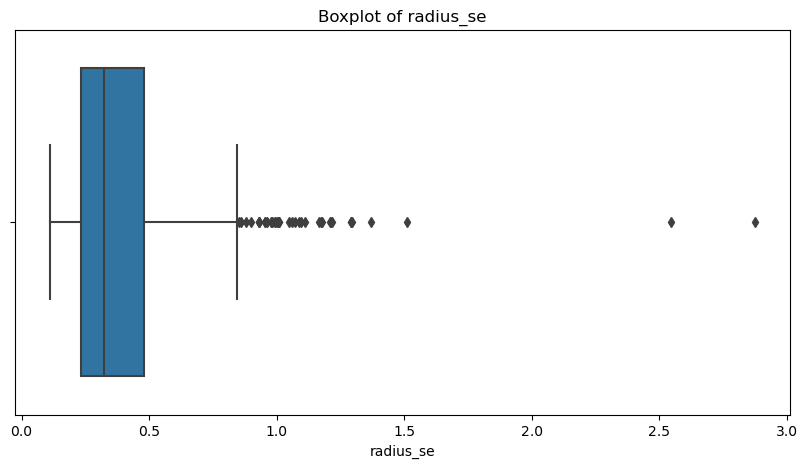

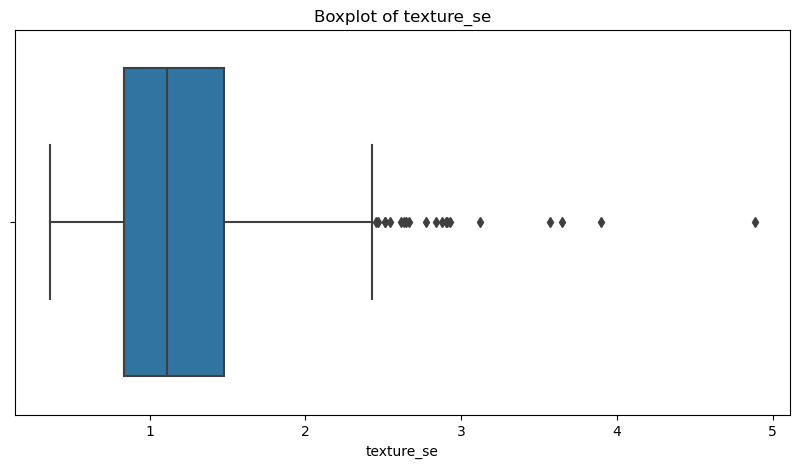

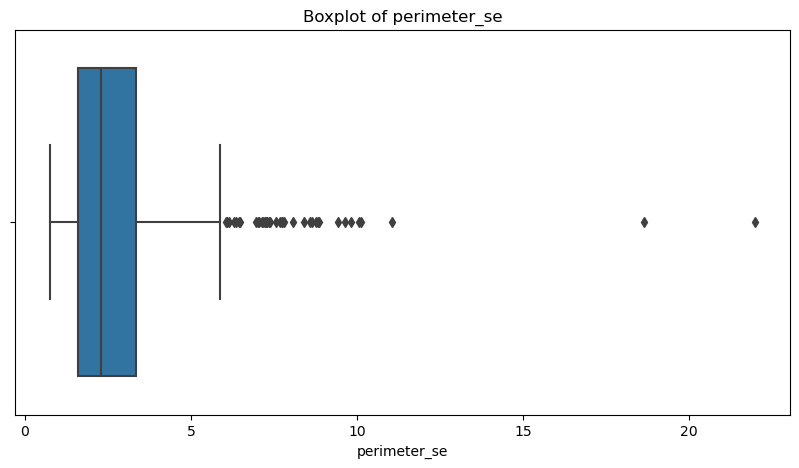

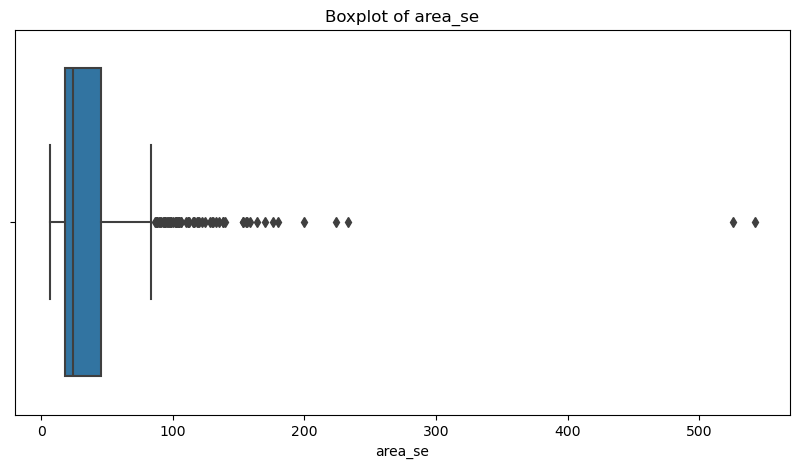

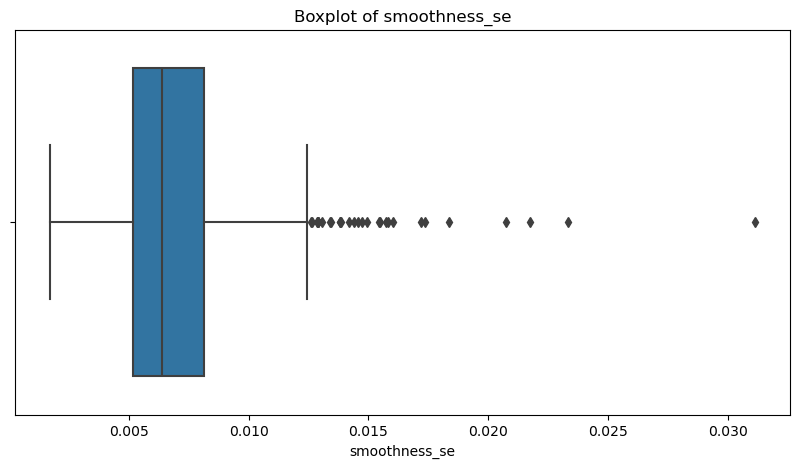

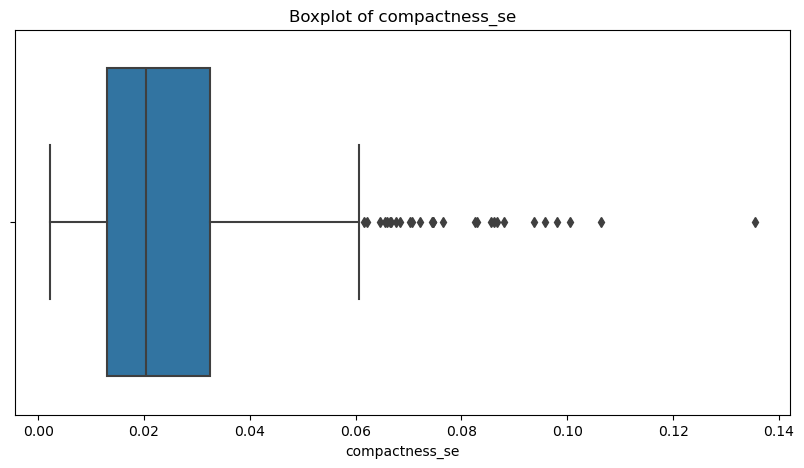

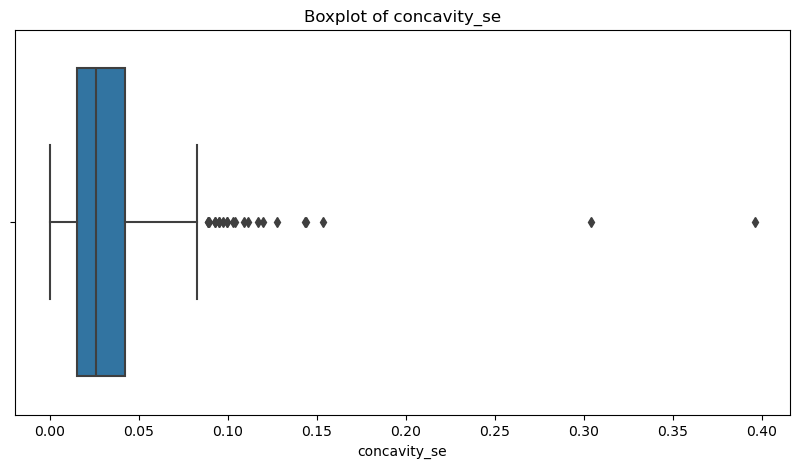

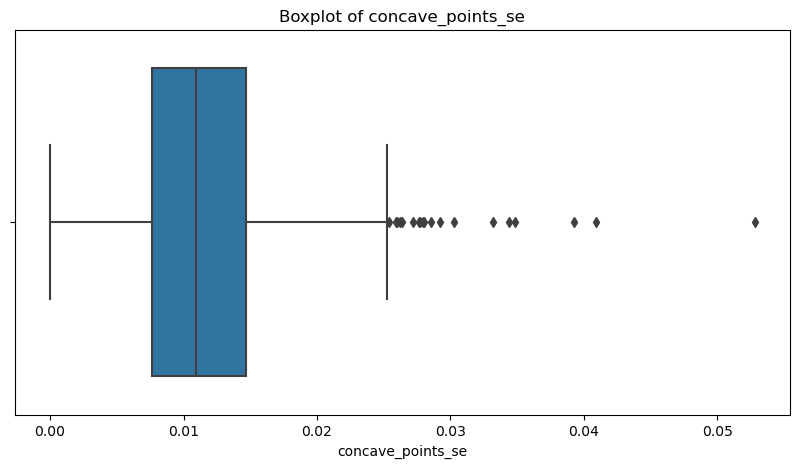

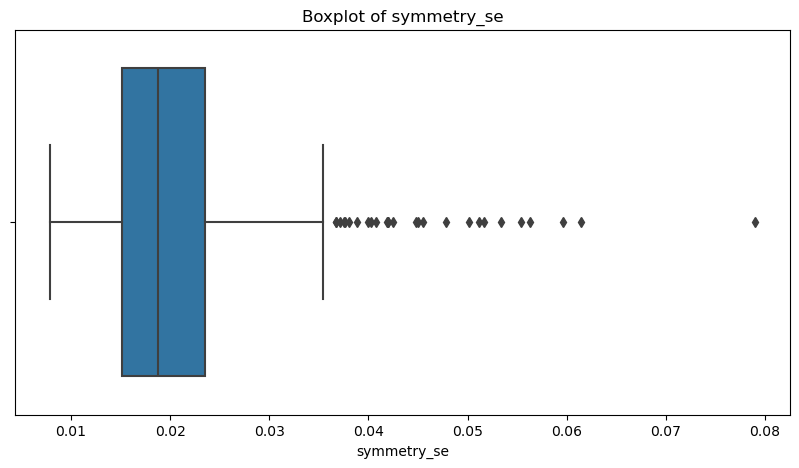

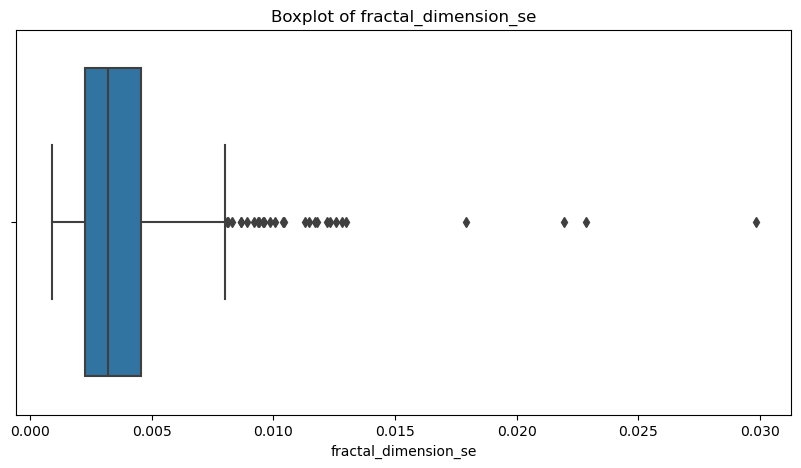

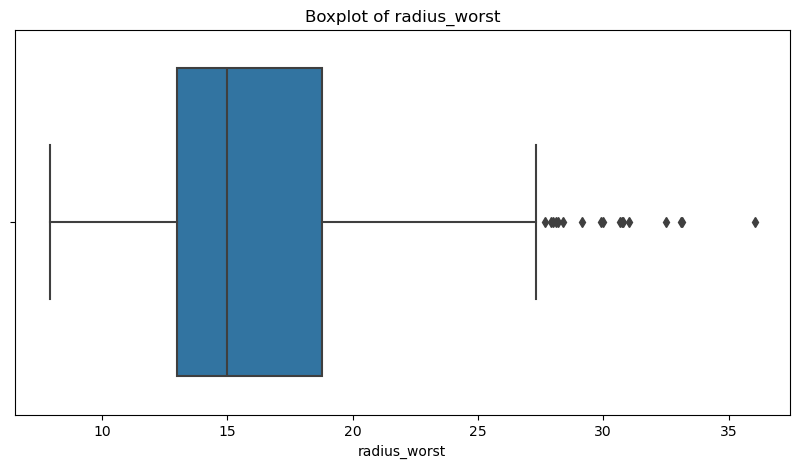

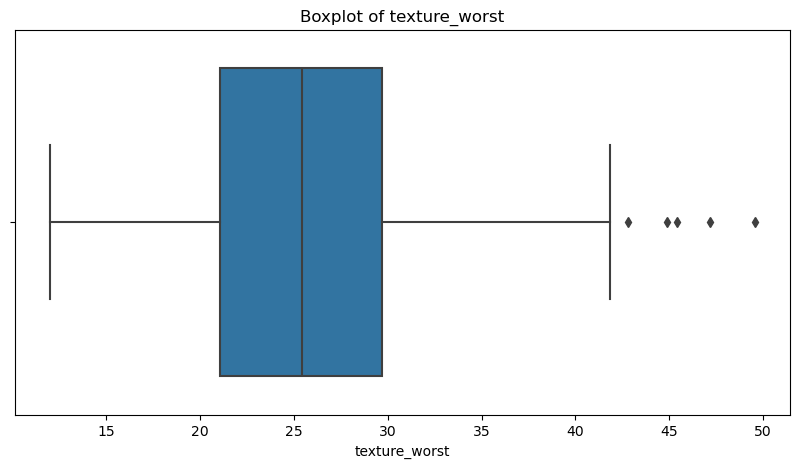

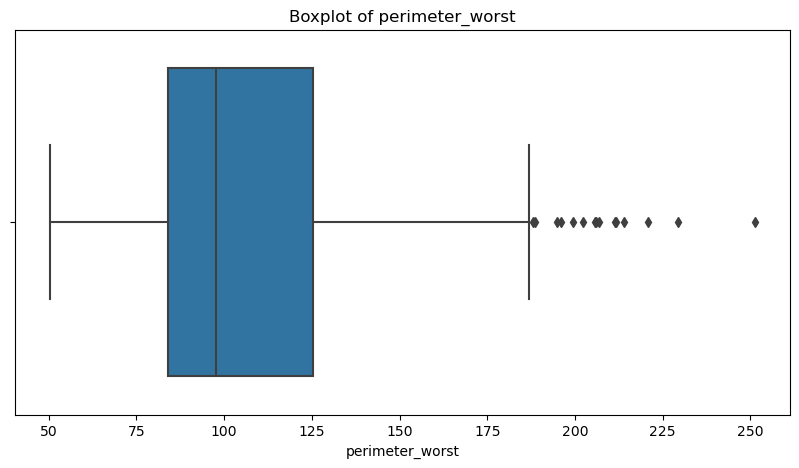

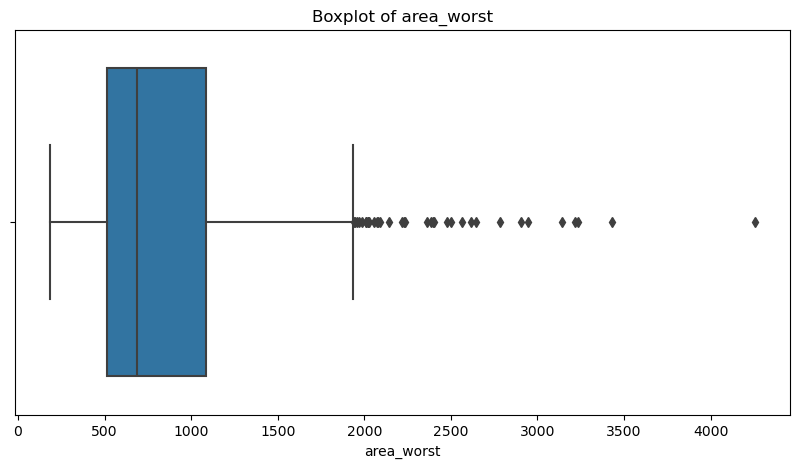

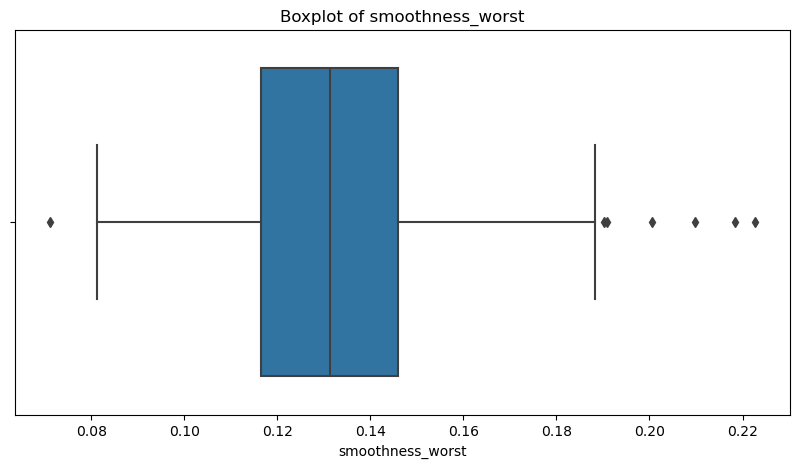

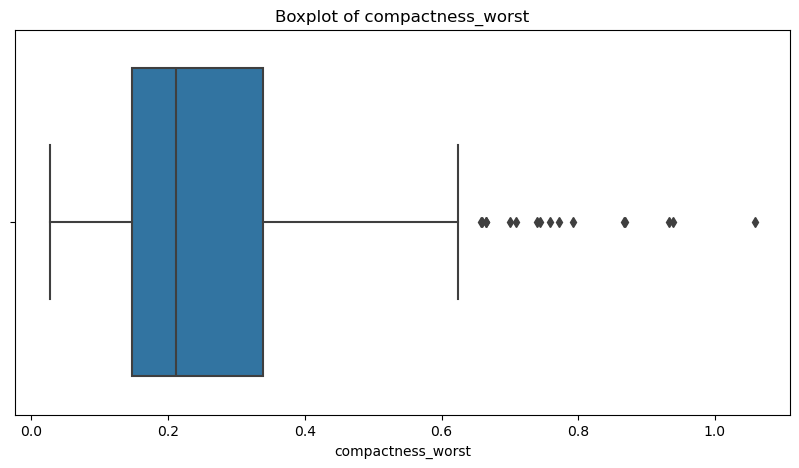

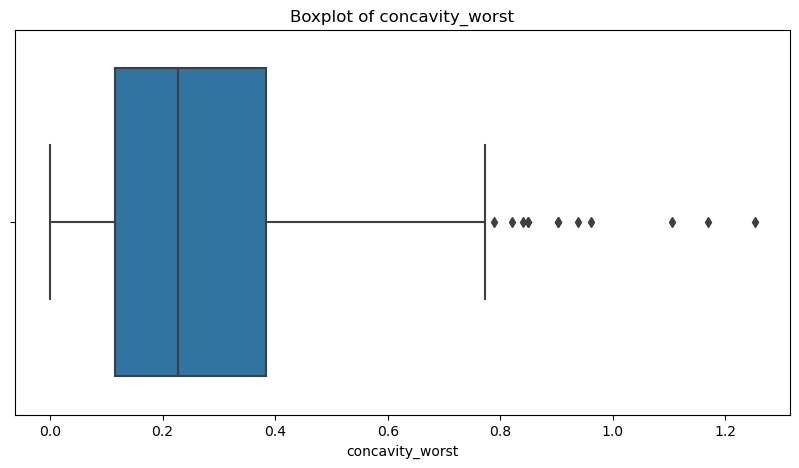

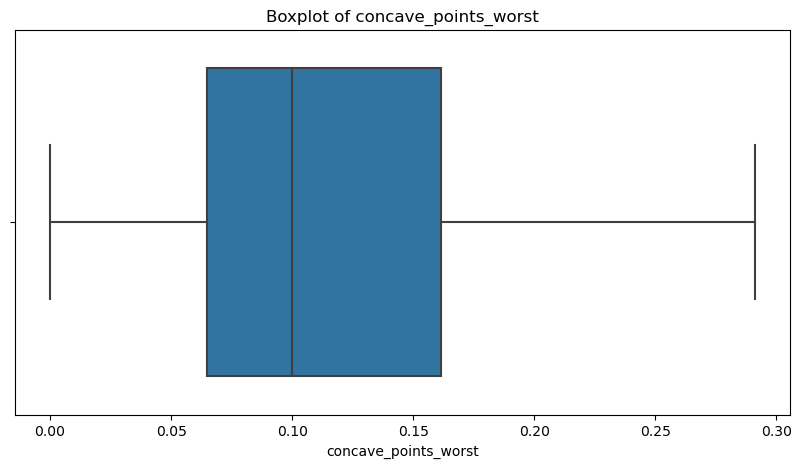

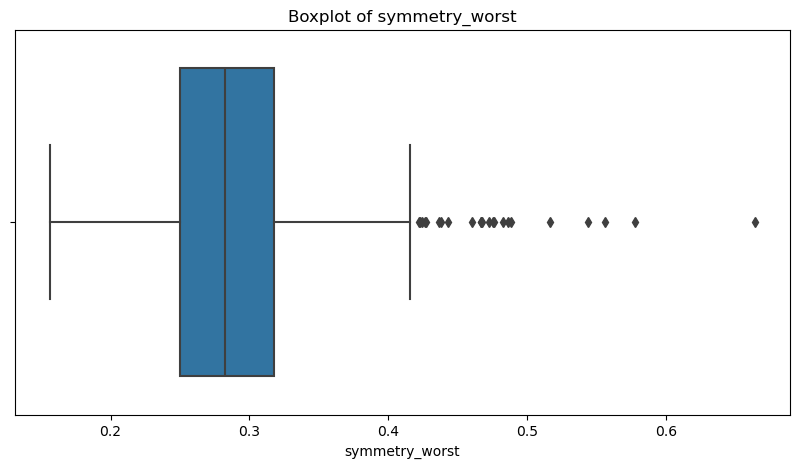

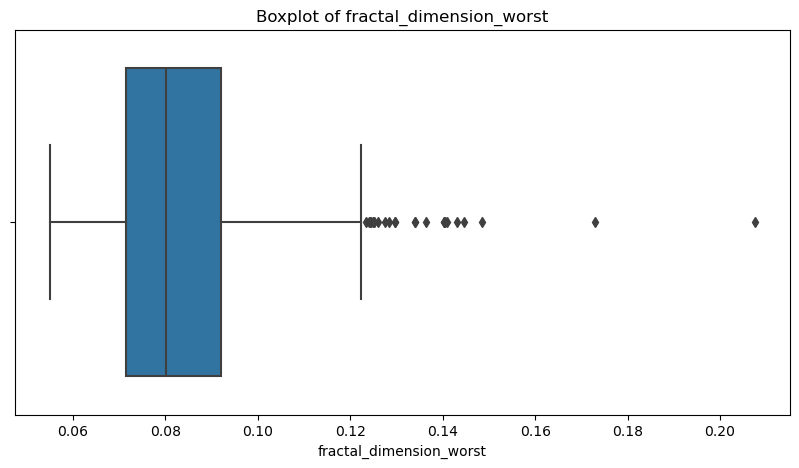

In [107]:
#Before removing outliers

# Plotting boxplots for numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Removing the outliers using Z-SCORE
Our remove_outliers function is designed to remove outliers from numerical columns in a DataFrame based on the Z-score method

In [108]:
# Function to remove outliers based on Z-score
def remove_outliers(df, z_thresh=3):
    df_out = df.copy()
    for col in df_out.select_dtypes(include=[np.number]).columns:
        z_scores = (df_out[col] - df_out[col].mean()) / df_out[col].std()
        df_out = df_out[(z_scores < z_thresh) & (z_scores > -z_thresh)]
    return df_out

# Apply the function
df_cleaned = remove_outliers(df)
df_cleaned

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
10,845636,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,924934,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
556,924964,0,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
558,925277,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
560,925292,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


# After removing outliers from our DataFrame df_cleaned

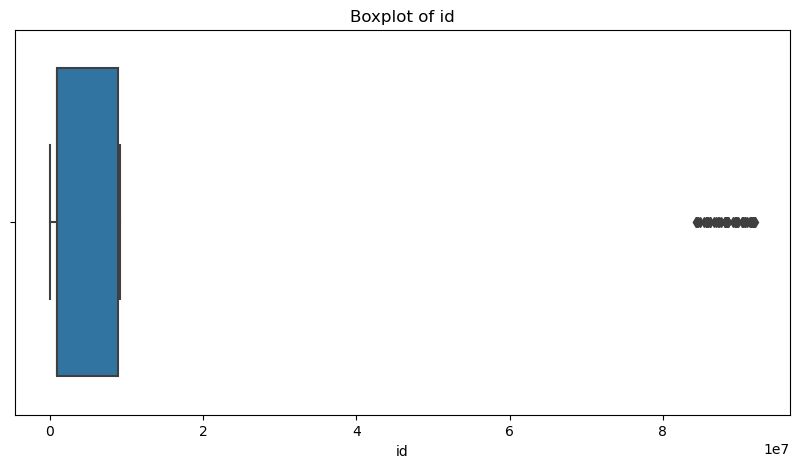

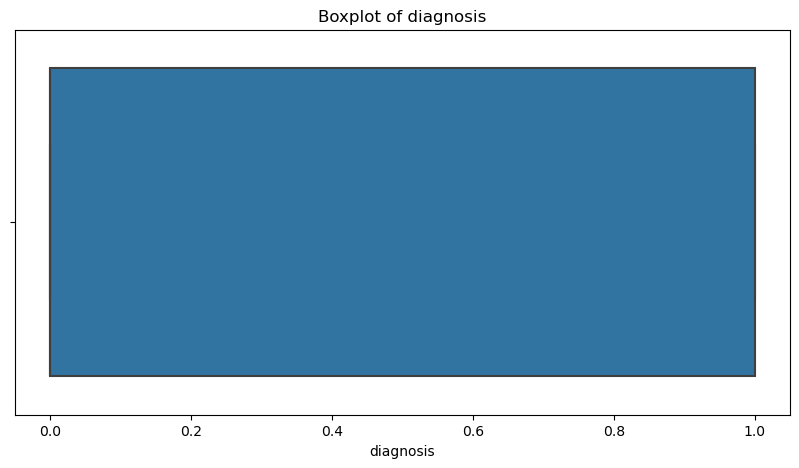

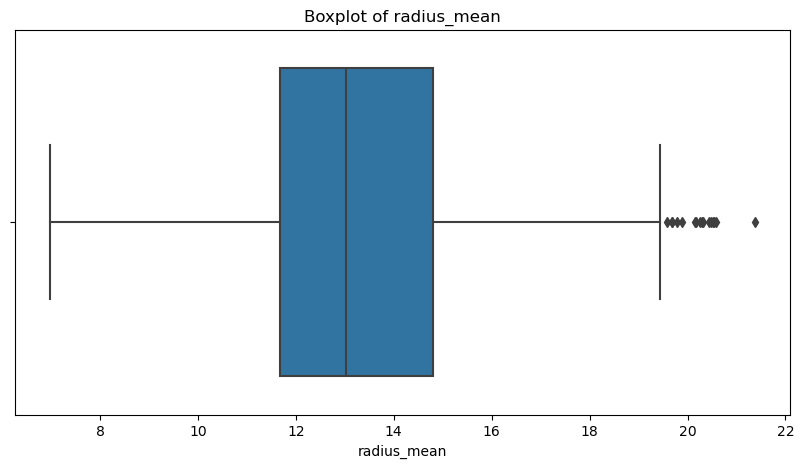

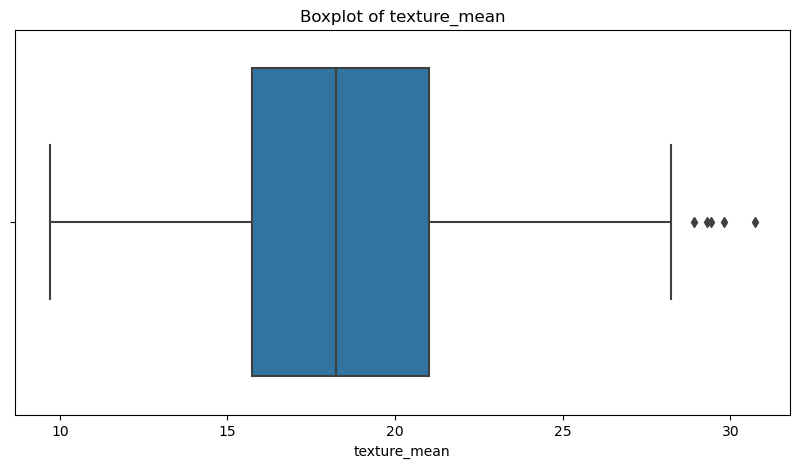

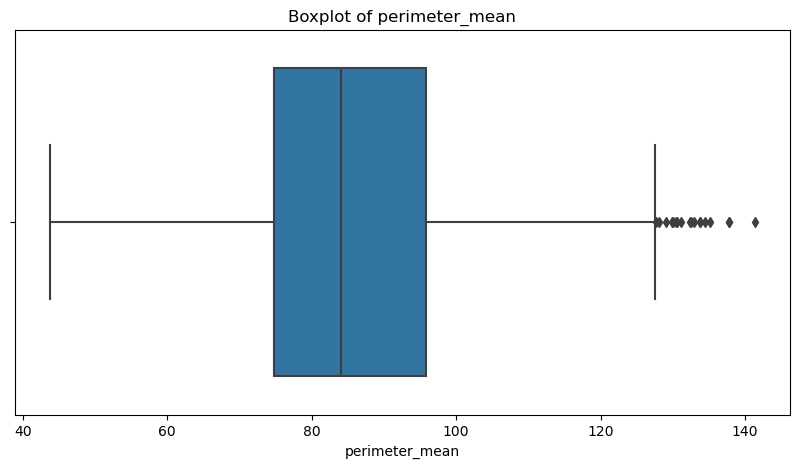

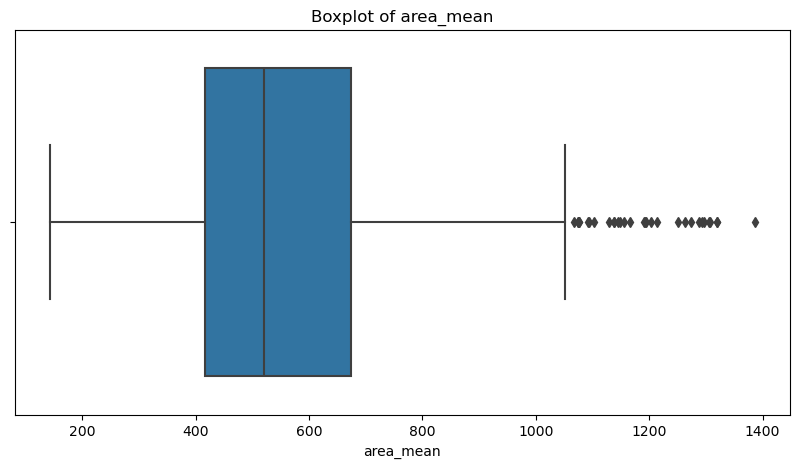

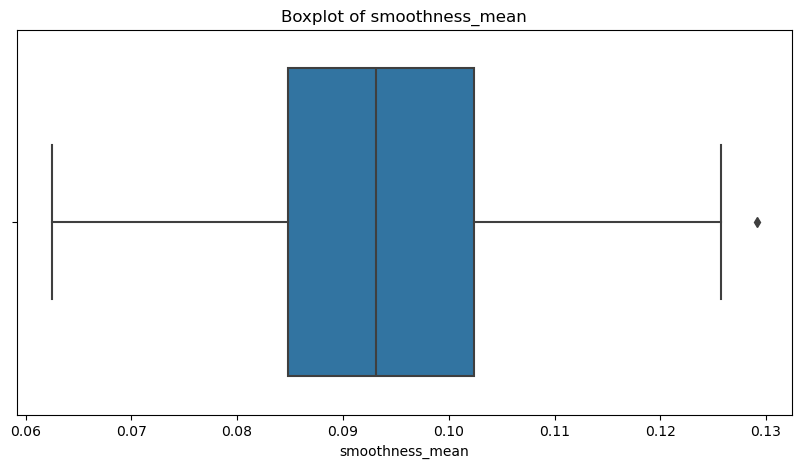

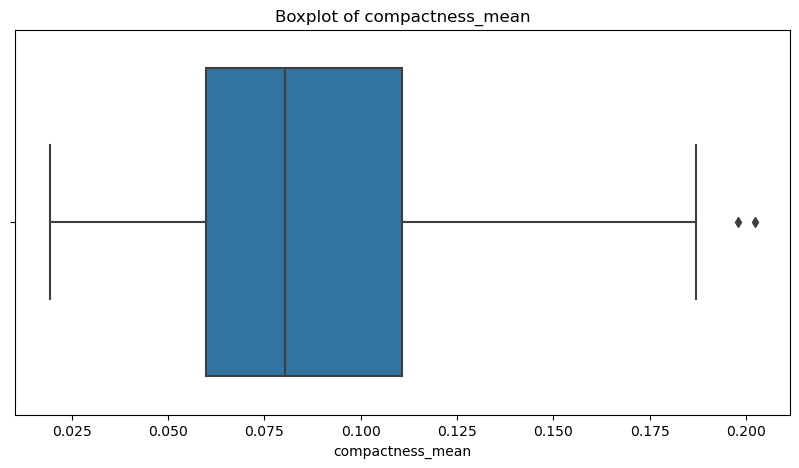

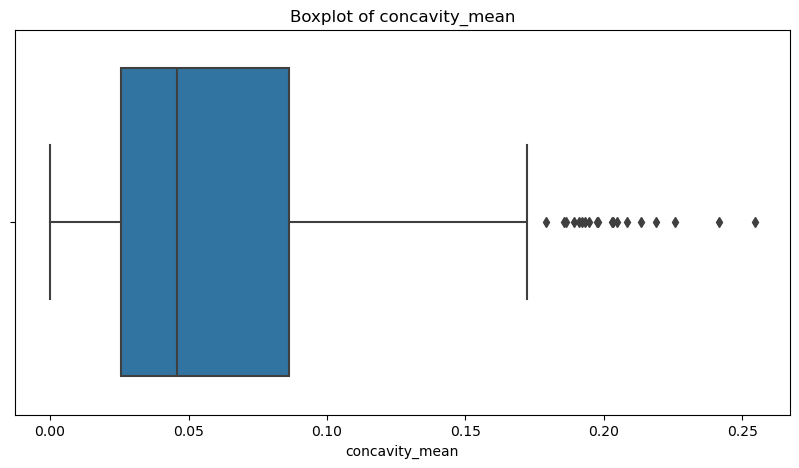

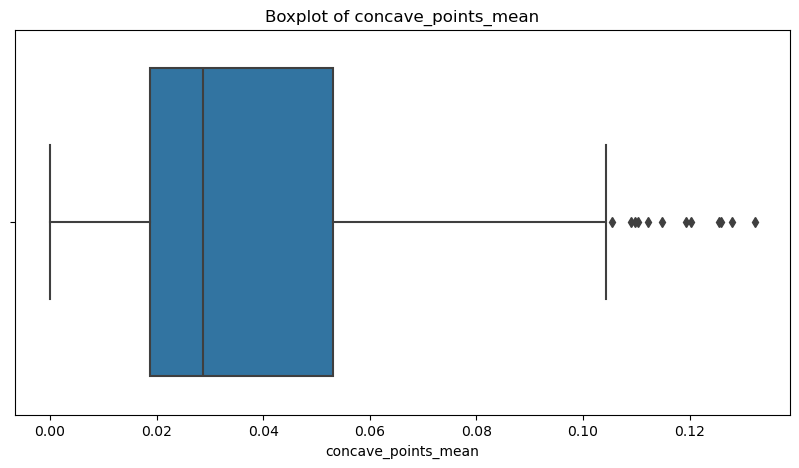

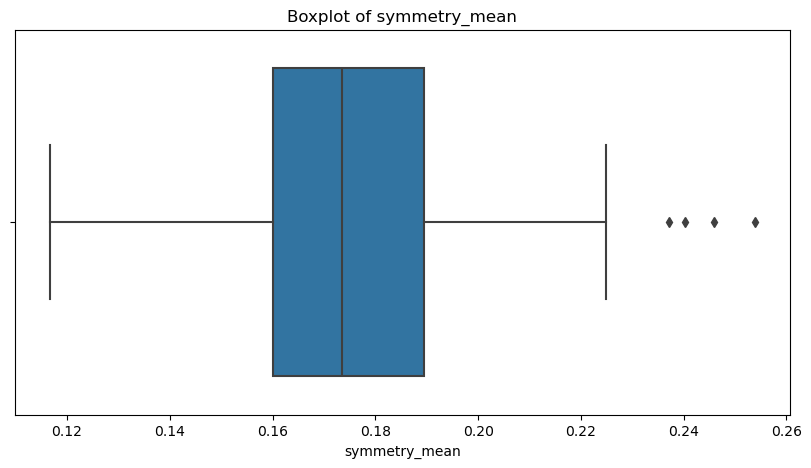

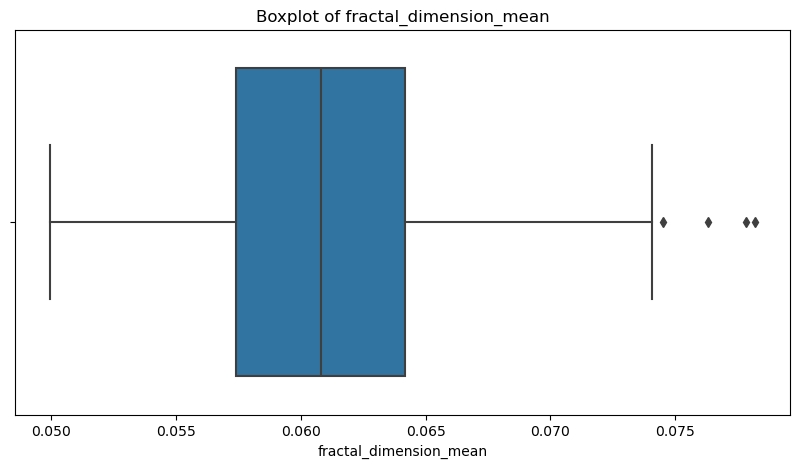

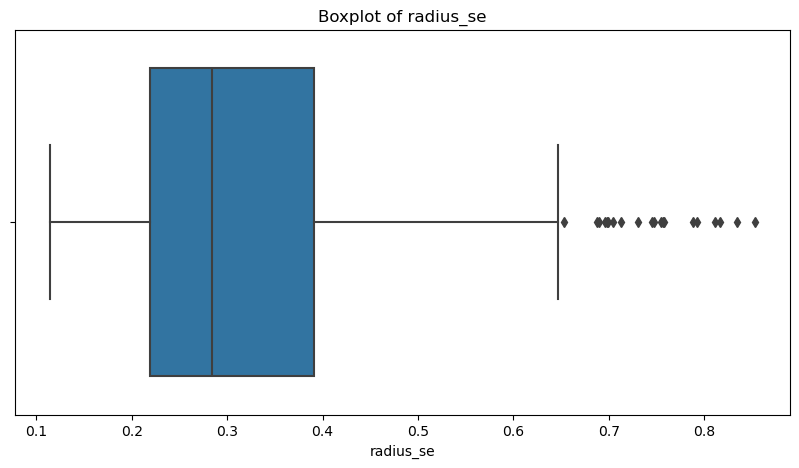

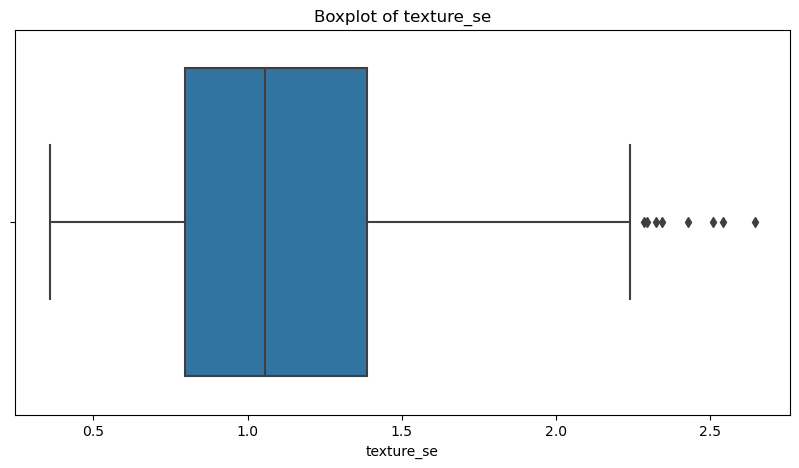

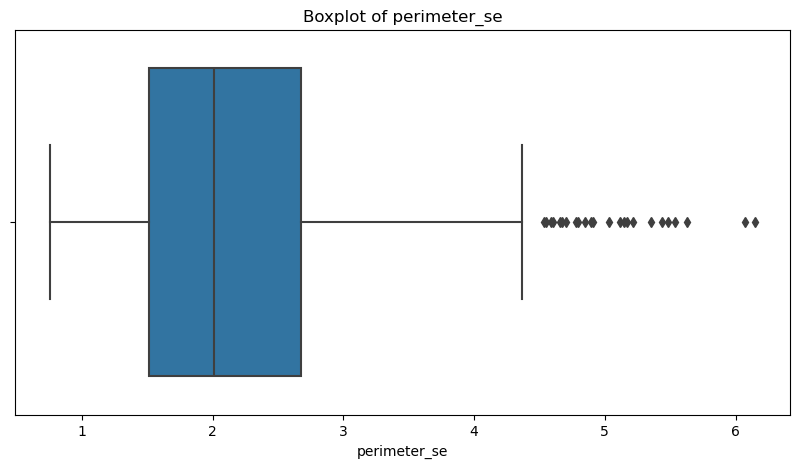

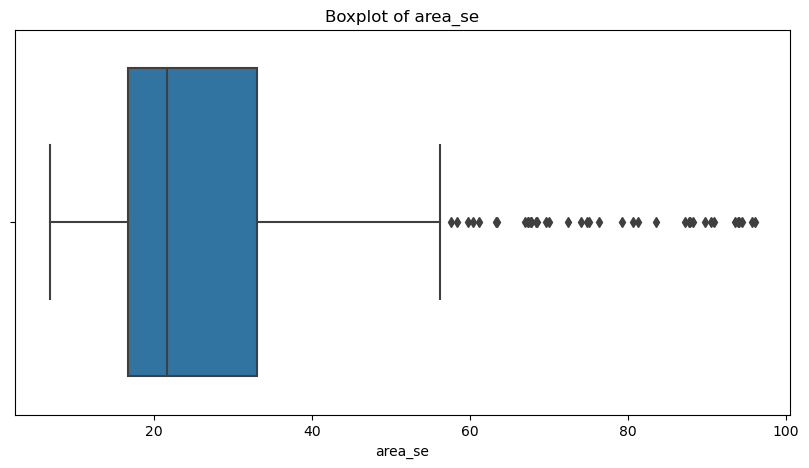

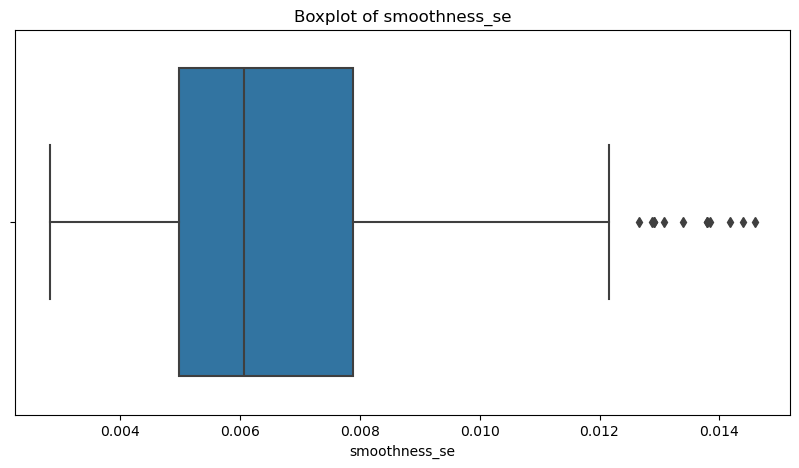

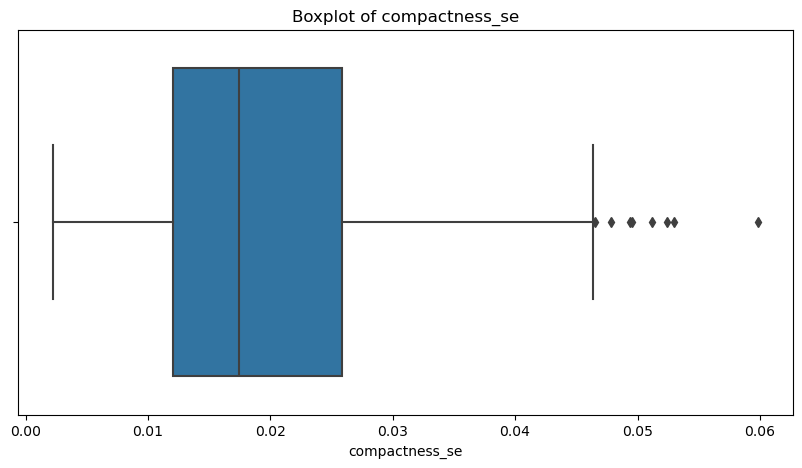

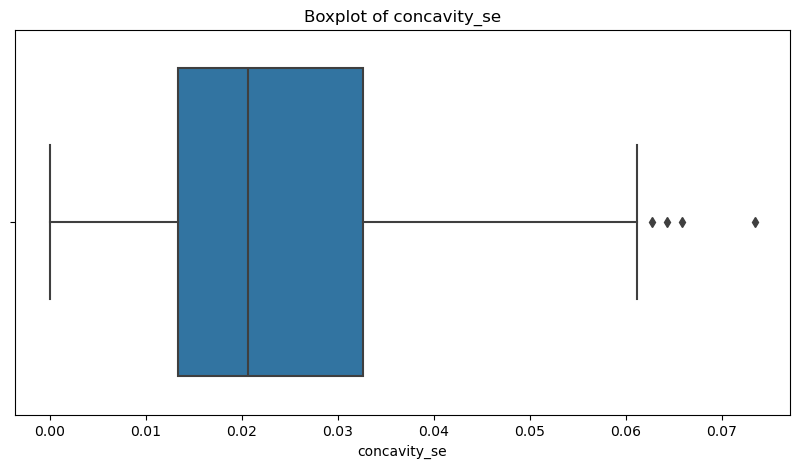

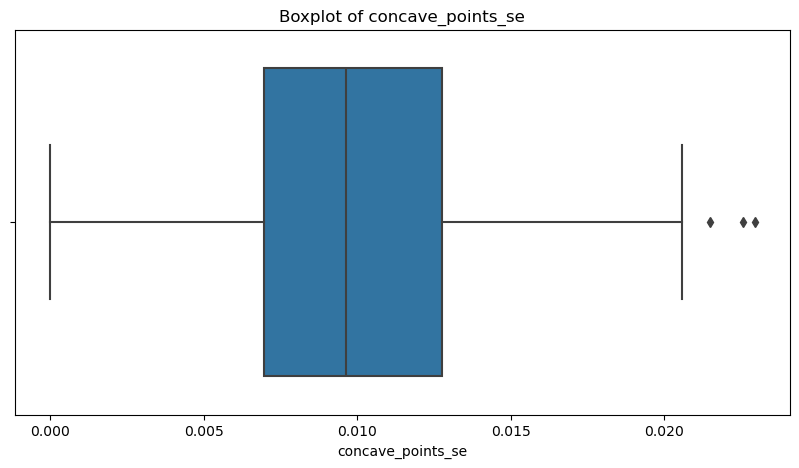

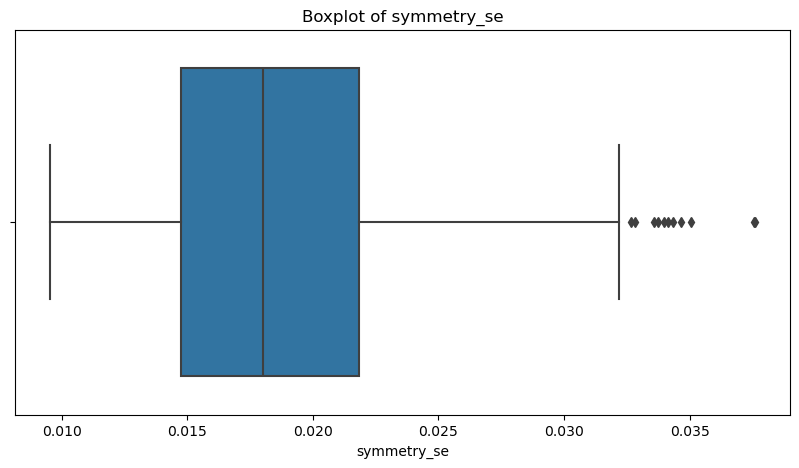

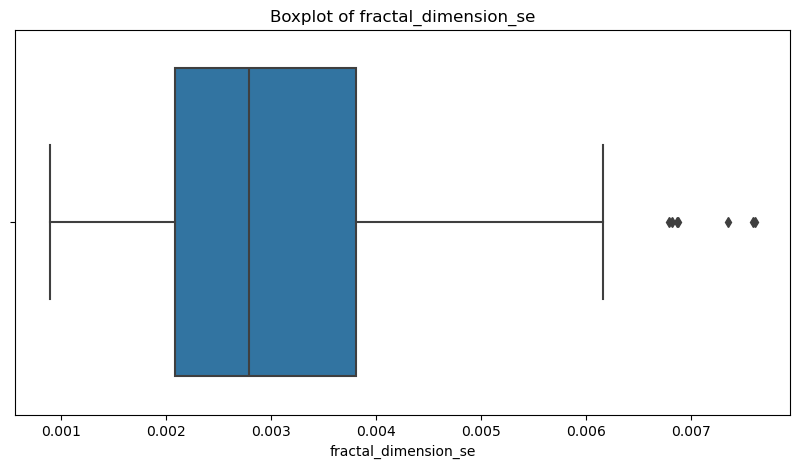

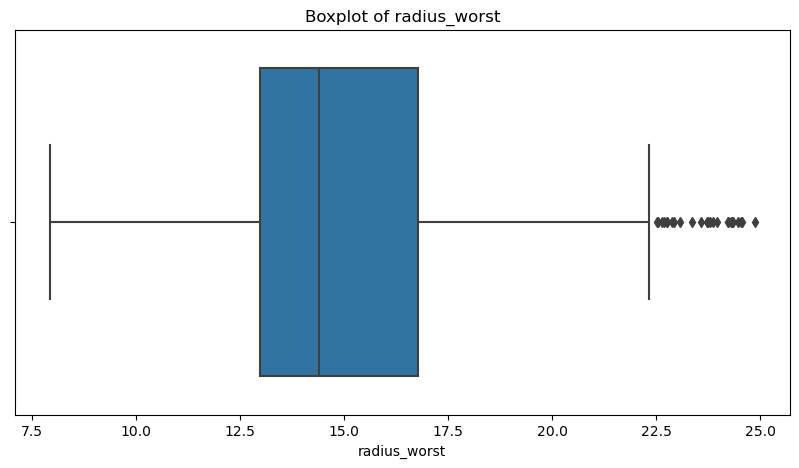

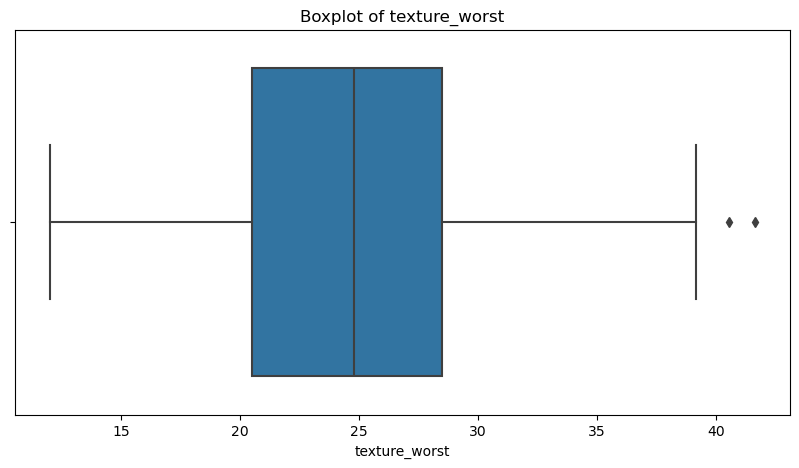

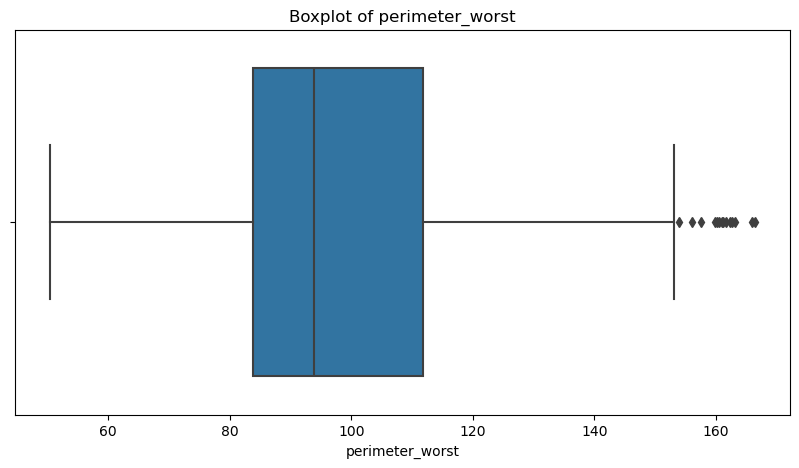

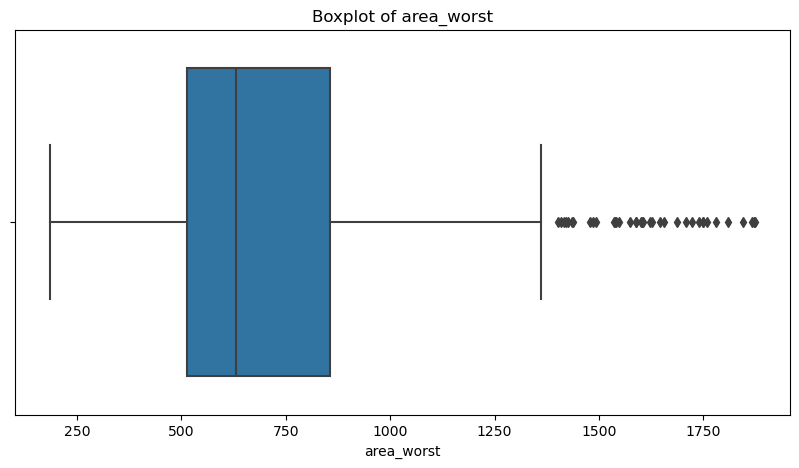

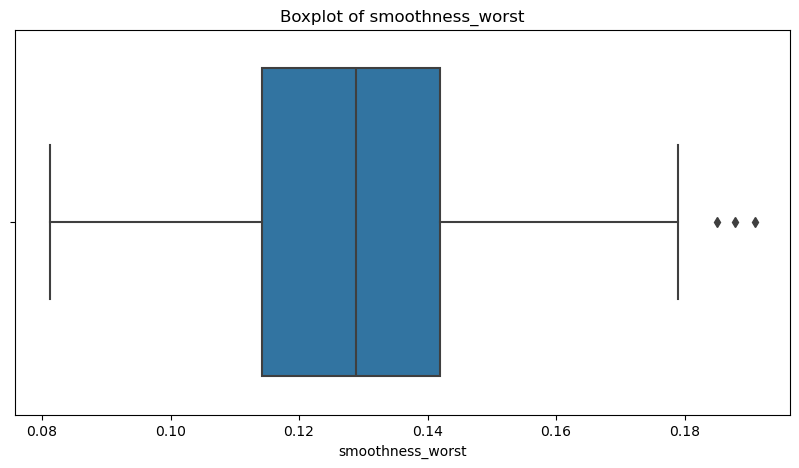

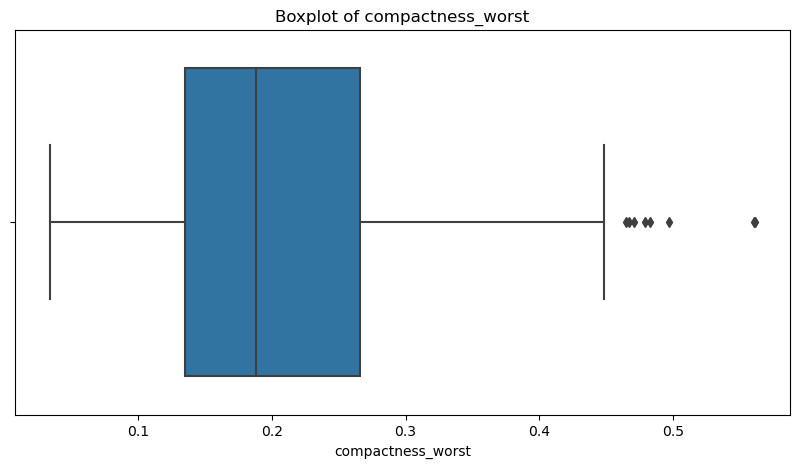

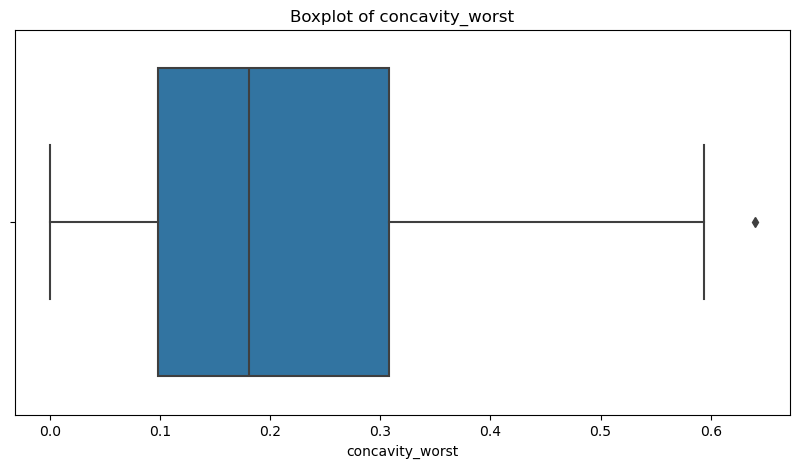

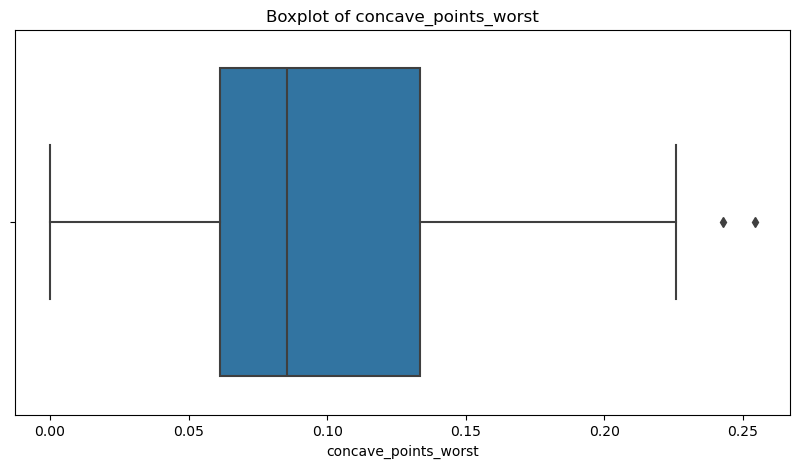

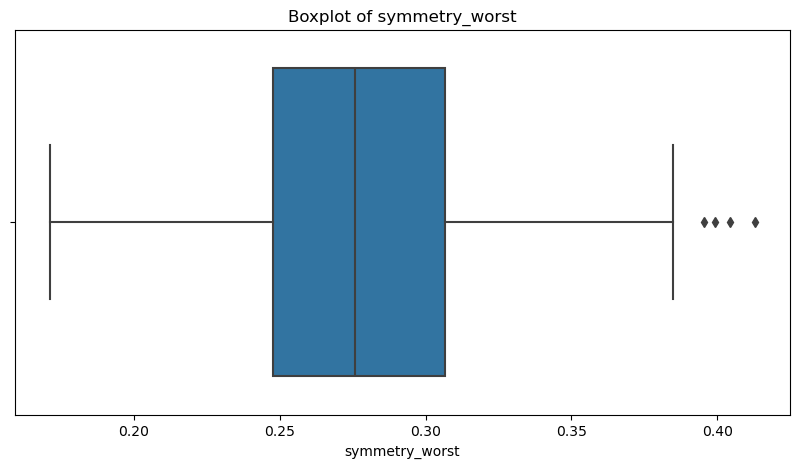

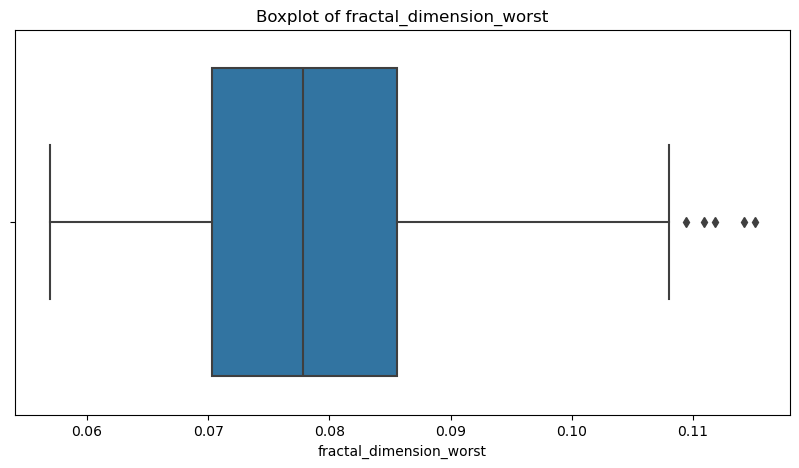

In [109]:
#after removing the outliers

# Plotting boxplots for numerical columns
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Droping the id column as it is not useful for further computation

In [110]:
dff=df_cleaned.drop(columns='id')
dff

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
10,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
556,0,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
558,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


# Separate independent variables (features) and dependent variable (target)

In [111]:
x=dff.drop(columns='diagnosis')
y=dff['diagnosis']

In [112]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.13260,0.10480,0.2250,0.08321


In [113]:
y

2      1
4      1
6      1
7      1
10     1
      ..
555    0
556    0
558    0
560    0
566    1
Name: diagnosis, Length: 417, dtype: int32

# Split the data into training and testing sets

In [114]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the features


In [115]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Finding the optimal KNN value
Our code snippet sets up and executes a grid search using GridSearchCV to find the optimal number of neighbors (n_neighbors) for a k-Nearest Neighbors classifier (KNeighborsClassifier). 

In [116]:
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 31)}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')


Best Parameters: {'n_neighbors': 3}
Best Cross-Validation Accuracy: 0.9586206896551724


# Create the k-Nearest Neighbors (k-NN) classifier model
To instantiate a k-Nearest Neighbors (k-NN) classifier with k=3 and fit it to your training data (x_train and y_train)

In [117]:
# Instantiate the model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

To make predictions on the test data (x_test) using the trained k-Nearest Neighbors (k-NN) classifier (knn)

In [118]:
# Make predictions on the test data
y_pred = knn.predict(x_test)


# Performance Evaluation
To evaluate the performance of your k-Nearest Neighbors (k-NN) classifier on the test data and generate metrics such as accuracy, confusion matrix, and classification repor

In [119]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.9444444444444444
Confusion Matrix:
[[85  2]
 [ 5 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        87
           1       0.94      0.87      0.91        39

    accuracy                           0.94       126
   macro avg       0.94      0.92      0.93       126
weighted avg       0.94      0.94      0.94       126



The model shows strong performance with an accuracy of 94.4%, indicating robust overall classification capability.
The confusion matrix reveals a good balance between true positive predictions and minimal false negatives across both classes.
Precision, recall, and F1-score metrics provide further insights into class-specific performance, highlighting high accuracy in predicting class 0 and slightly lower but still strong performance for class 1.